In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
fraud_train_df = pd.read_csv("/content/fraudTrain.csv")
fraud_test_df = pd.read_csv("//content/fraudTest.csv")
fraud_train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [41]:
fraud_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030536 entries, 0 to 1030535
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1030536 non-null  int64  
 1   trans_date_trans_time  1030536 non-null  object 
 2   cc_num                 1030536 non-null  int64  
 3   merchant               1030536 non-null  object 
 4   category               1030536 non-null  object 
 5   amt                    1030536 non-null  float64
 6   first                  1030536 non-null  object 
 7   last                   1030536 non-null  object 
 8   gender                 1030536 non-null  object 
 9   street                 1030536 non-null  object 
 10  city                   1030535 non-null  object 
 11  state                  1030535 non-null  object 
 12  zip                    1030535 non-null  float64
 13  lat                    1030535 non-null  float64
 14  long              

In [42]:
fraud_train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.030536e+06,1.030536e+06,1.030536e+06,1.030535e+06,1.030535e+06,1.030535e+06,1.030535e+06,1.030535e+06,1.030535e+06,1.030535e+06,1.030535e+06
mean,5.152675e+05,4.172934e+17,7.029318e+01,4.880513e+04,3.853348e+01,-9.022848e+01,8.908149e+04,1.344596e+09,3.853347e+01,-9.022879e+01,5.766907e-03
std,2.974903e+05,1.309006e+18,1.603667e+02,2.689860e+04,5.077473e+00,1.376139e+01,3.025519e+05,1.001032e+07,5.111792e+00,1.377378e+01,7.572091e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2.576338e+05,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336472e+09,3.473074e+01,-9.689979e+01,0.000000e+00
50%,5.152675e+05,3.520550e+15,4.744000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344664e+09,3.936373e+01,-8.744036e+01,0.000000e+00
75%,7.729012e+05,4.642255e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.353967e+09,4.195571e+01,-8.023278e+01,0.000000e+00
max,1.030535e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362266e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [43]:
fraud_train_df["is_fraud"].value_counts()

is_fraud
0.0    1024592
1.0       5943
Name: count, dtype: int64

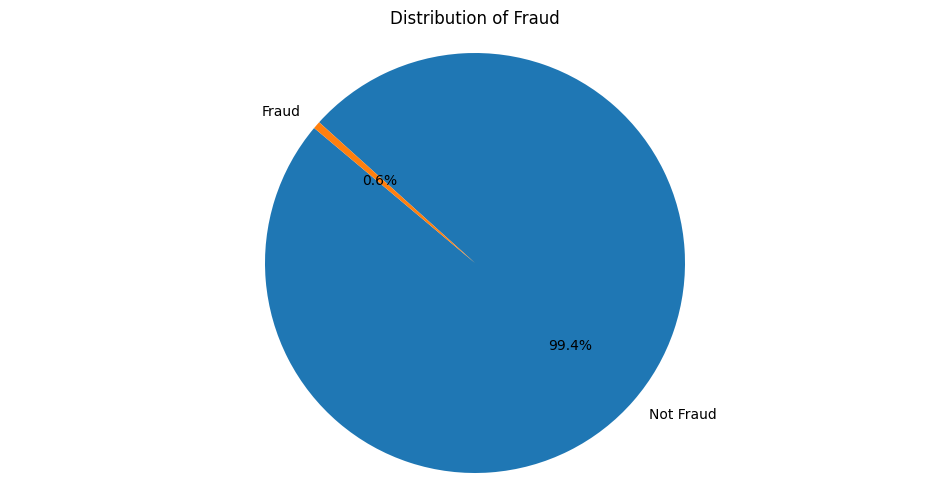

In [44]:
plt.figure(figsize = (12,6))
labels = ["Not Fraud","Fraud"]
values =fraud_train_df.is_fraud.value_counts()
plt.pie(values,labels = labels,autopct = "%1.1f%%",startangle = 140)
plt.title("Distribution of Fraud")
plt.axis("equal")
plt.show()

In [46]:
fraud_train_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_test_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [47]:
fraud_train_df["is_fraud"].value_counts()


is_fraud
0.0    1024592
1.0       5943
Name: count, dtype: int64

In [48]:
fraud_train_df.drop(columns = ['first','last','cc_num','lat', 'long','merch_lat','merch_long','state','city','trans_num','street','zip','dob'],inplace = True)
fraud_test_df.drop(columns = ['first','last','cc_num','lat', 'long','merch_lat','merch_long','state','city','trans_num','street','zip','dob'],inplace = True)

In [49]:
categorical_col = ['job','category','merchant','gender']
numerical_col = ['amt','location_cluster','location_cluster_merch','unix_time','city_pop']
categorical_col , numerical_col


(['job', 'category', 'merchant', 'gender'],
 ['amt',
  'location_cluster',
  'location_cluster_merch',
  'unix_time',
  'city_pop'])

In [50]:
encoder = LabelEncoder()
for col in categorical_col:
  fraud_train_df[col] = encoder.fit_transform(fraud_train_df[col])
  fraud_test_df[col] = encoder.fit_transform(fraud_test_df[col])

In [51]:
input_col = numerical_col + categorical_col
target_col = 'is_fraud'

In [ ]:
X = fraud_train_df[input_col]
X_test = fraud_test_df[input_col]
y = fraud_train_df[target_col]
y_test = fraud_test_df[target_col]

In [ ]:
model_svc = SVC()
model_svc.fit(X, y)